Yurag, Marivient Alexia R.

BSCS - IS - 4B

**EXERCISE 2:  Feature Extraction and Object
Detection**

**Task 1: SIFT Feature Extraction**

In [ ]:
!pip install opencv-contrib-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

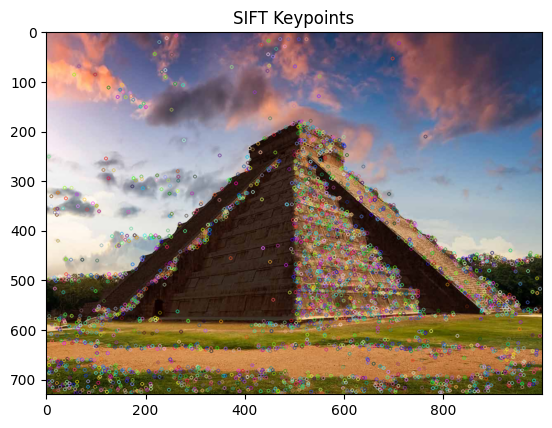

In [ ]:
#Load the Image
image = cv2.imread('mexico.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Initialize SIFT detector
sift = cv2.SIFT_create()

#Detec keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

#Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

#Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()


**Task 2: SURF Feature Extraction**

Cloning OpenCV from github to install necessary libraries to enbale SURF feature extraction

In [ ]:
!apt-get update
!apt-get install -y cmake libjpeg-dev libpng-dev libtiff-dev
!apt-get install -y libavcodec-dev libavformat-dev libswscale-dev
!apt-get install -y libv4l-dev libxvidcore-dev libx264-dev
!apt-get install -y libgtk2.0-dev libatlas-base-dev gfortran
!apt-get install -y python3-dev

# Clone OpenCV and OpenCV Contrib
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git


In [ ]:
import cv2
try:
    surf = cv2.xfeatures2d.SURF_create()
    print("SURF is enabled and ready to use!")
except AttributeError:
    print("SURF is not available.")


SURF is enabled and ready to use!


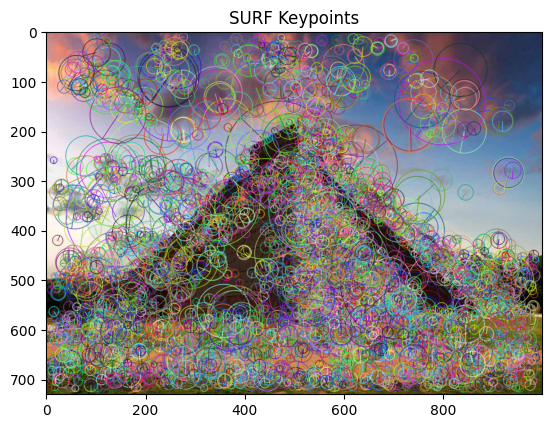

In [ ]:
#Load Image
image = cv2.imread('mexico.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create()

#Detect keypints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert BGR to RGB for displaying in matplotlib
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()


**Task 3: ORB Feature Extraction**

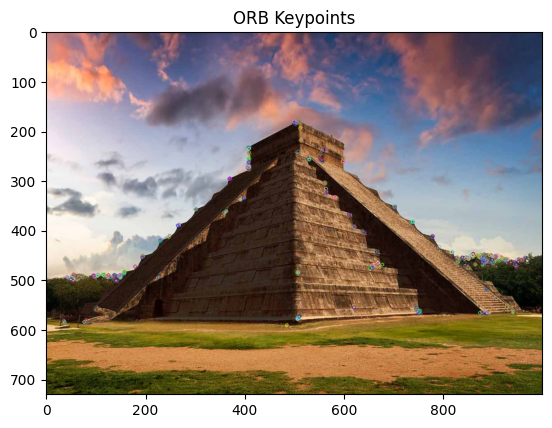

In [ ]:
#Load Image
image = cv2.imread('mexico.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

##Initialize ORB detector
orb = cv2.ORB_create()

#Detect keypints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

##Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

#Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()



**Task 4: Feature Matching**

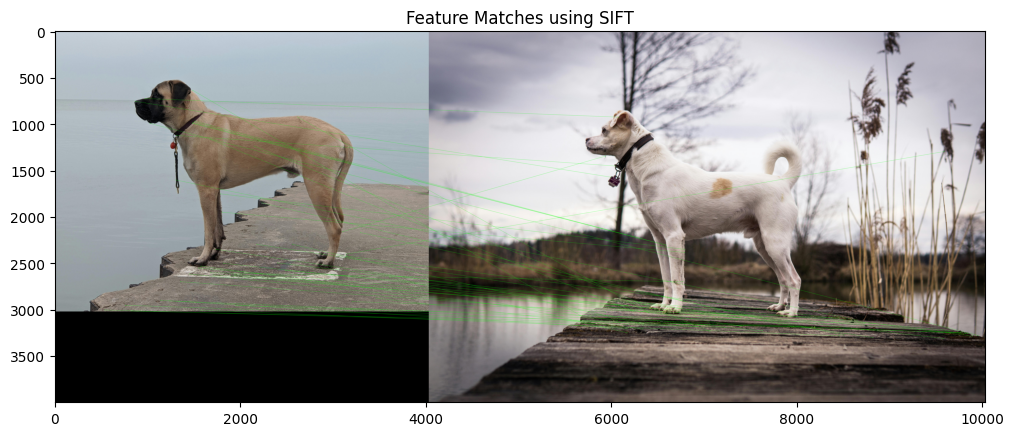

In [ ]:
# Load two images
image1 = cv2.imread('dog1.jpg')
image2 = cv2.imread('dog2.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # The number of checks

# Initialize the FLANN-based matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Perform the matching between descriptors
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply the ratio test to get the good matches (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw the matches with thicker, colored lines
matched_image = cv2.drawMatches(
    image1, keypoints1,
    image2, keypoints2,
    good_matches, None,
    matchColor=(0, 260, 0),  # Green color for matches
    singlePointColor=(270, 0, 0),  # Blue color for keypoints
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display the image with matches
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Feature Matches using SIFT')
plt.show()

**Task 5: Application of Feature Matching**

**Image Stitching using HOMOGRAPHY**

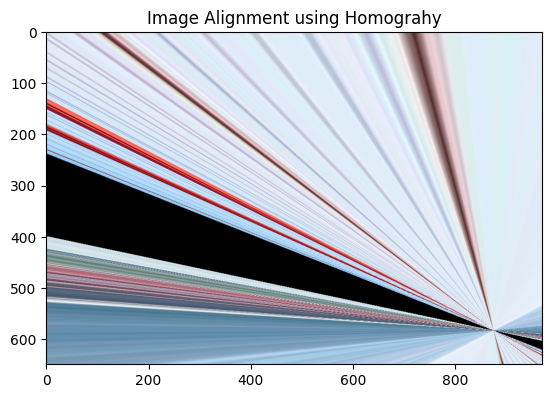

In [ ]:
#Loading two images
image1 = cv2.imread('bridge1.jpeg')
image2 = cv2.imread('bridge2.jpg')

#Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

#Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

#Apply ratio test (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

    #Extract location of good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    #Find homography matrix
    #Corrected function name from findingHomography to findHomography
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    #Warp one image to align with the other
h,w, _ = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

    #Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Image Alignment using Homograhy')
plt.show()


**Task 6: Combining Feature Extraction Methods**

**ORB and SIFT Feature Extraction**

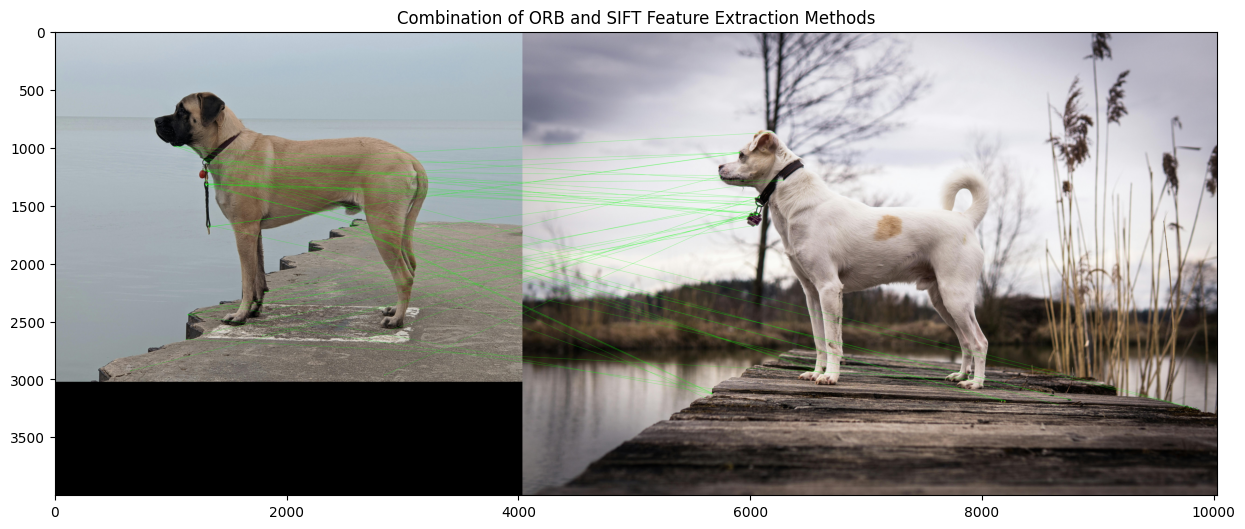

In [ ]:
# Load Images
image1 = cv2.imread('dog1.jpg')
image2 = cv2.imread('dog2.jpg')

# SIFT detector
sift = cv2.SIFT_create()
keypoints_sift1, descriptors_sift1 = sift.detectAndCompute(image1, None)
keypoints_sift2, descriptors_sift2 = sift.detectAndCompute(image2, None)

# ORB detector
orb = cv2.ORB_create()
keypoints_orb1, descriptors_orb1 = orb.detectAndCompute(image1, None)
keypoints_orb2, descriptors_orb2 = orb.detectAndCompute(image2, None)

# Cross-Check Matching (BFMatcher with crossCheck=True)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_orb1, descriptors_orb2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches with thicker, bolder lines
match_img = cv2.drawMatches(
    image1, keypoints_orb1, image2, keypoints_orb2, matches[:50], None,
    matchColor=(0, 255, 0),  # Green color for matches
    singlePointColor=(255, 0, 0),  # Red color for keypoints
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display the matches
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title('Combination of ORB and SIFT Feature Extraction Methods')
plt.show()